In [54]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from RandomForestForTimeSeriesRegressor import RandomForestForTimeSeriesRegressor, BLOCK_TYPES

In [55]:
dataset = pd.read_csv('sp500_enriquecido.csv')

In [56]:
dataset = dataset.dropna()
dataset

,Date,Adj_close,DateOrdinal,average_price,DayOfWeek,DayOfYear,WeekOfYear,is_start_of_month,is_end_of_month,quarter,...,Up_Last_30,Down_Last_30,Up_Last_7,Down_Last_7,Up_Last_14,Down_Last_14,Up_Streak,Down_Streak,Max_Up_Streak_30,Max_Down_Streak_30
0,2018-01-02,2695.81,20180102,2689.125,1,2,1,0,0,1,...,11.0,8.0,2.0,2.0,3.0,5.0,1,0,5.0,2.0
1,2018-01-03,2713.06,20180103,2706.070,2,3,1,0,0,1,...,12.0,8.0,3.0,1.0,4.0,4.0,2,0,5.0,2.0
2,2018-01-04,2723.99,20180104,2724.180,3,4,1,0,0,1,...,12.0,8.0,3.0,1.0,5.0,3.0,3,0,5.0,2.0
3,2018-01-05,2743.15,20180105,2735.685,4,5,1,0,0,1,...,13.0,7.0,3.0,1.0,5.0,3.0,4,0,5.0,2.0
4,2018-01-08,2747.71,20180108,2743.055,0,8,2,0,0,1,...,12.0,6.0,4.0,0.0,6.0,2.0,5,0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2020-12-24,3703.06,20201224,3696.570,3,359,52,0,0,4,...,14.0,7.0,3.0,2.0,6.0,4.0,0,1,5.0,3.0
752,2020-12-28,3735.36,20201228,3731.770,0,363,53,0,0,4,...,11.0,8.0,2.0,2.0,6.0,3.0,1,0,4.0,3.0
753,2020-12-29,3727.04,20201229,3739.715,1,364,53,0,0,4,...,12.0,8.0,3.0,1.0,6.0,3.0,2,0,4.0,3.0
754,2020-12-30,3732.04,20201230,3737.420,2,365,53,0,0,4,...,13.0,8.0,3.0,1.0,6.0,3.0,0,1,4.0,3.0


In [57]:
calculatedFields = [col for col in dataset.columns if col not in ['Date', 'average_price']]
fieldsPrice = ["average_price"]
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [58]:
from datetime import datetime

pivote_date = datetime.strptime("01/01/2018", "%d/%m/%Y")
max_train_day = datetime.strptime("31/12/2018", "%d/%m/%Y") #pivote_date + pd.DateOffset(days=1825)
max_day = datetime.strptime("31/12/2020", "%d/%m/%Y")
max_test_1 = datetime.strptime("30/06/2019", "%d/%m/%Y")
max_test_2 = datetime.strptime("31/12/2019", "%d/%m/%Y")
max_test_3 = datetime.strptime("31/03/2019", "%d/%m/%Y")
trainBlock = dataset[(dataset['Date'] >= pivote_date) & (dataset['Date'] <= max_train_day)]

testBlock_6months = dataset[(dataset['Date'] > max_train_day) & (dataset['Date'] <= max_test_1)] 
testBlock_1year = dataset[(dataset['Date'] > max_train_day) & (dataset['Date'] <= max_test_2)] 
testBlock_2years = dataset[(dataset['Date'] > max_train_day) & (dataset['Date'] <= max_test_3)] 

trainBlock

,Date,Adj_close,DateOrdinal,average_price,DayOfWeek,DayOfYear,WeekOfYear,is_start_of_month,is_end_of_month,quarter,...,Up_Last_30,Down_Last_30,Up_Last_7,Down_Last_7,Up_Last_14,Down_Last_14,Up_Streak,Down_Streak,Max_Up_Streak_30,Max_Down_Streak_30
0,2018-01-02,2695.81,20180102,2689.125,1,2,1,0,0,1,...,11.0,8.0,2.0,2.0,3.0,5.0,1,0,5.0,2.0
1,2018-01-03,2713.06,20180103,2706.070,2,3,1,0,0,1,...,12.0,8.0,3.0,1.0,4.0,4.0,2,0,5.0,2.0
2,2018-01-04,2723.99,20180104,2724.180,3,4,1,0,0,1,...,12.0,8.0,3.0,1.0,5.0,3.0,3,0,5.0,2.0
3,2018-01-05,2743.15,20180105,2735.685,4,5,1,0,0,1,...,13.0,7.0,3.0,1.0,5.0,3.0,4,0,5.0,2.0
4,2018-01-08,2747.71,20180108,2743.055,0,8,2,0,0,1,...,12.0,6.0,4.0,0.0,6.0,2.0,5,0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,2351.10,20181224,2380.720,0,358,52,0,0,4,...,9.0,10.0,0.0,5.0,2.0,8.0,0,8,6.0,7.0
247,2018-12-26,2467.70,20181226,2407.170,2,360,52,0,0,4,...,9.0,11.0,0.0,4.0,1.0,8.0,1,0,6.0,8.0
248,2018-12-27,2488.83,20181227,2443.520,3,361,52,0,0,4,...,9.0,11.0,1.0,3.0,1.0,8.0,2,0,6.0,8.0
249,2018-12-28,2485.74,20181228,2496.580,4,362,52,0,0,4,...,9.0,11.0,2.0,2.0,2.0,7.0,3,0,6.0,8.0


In [59]:
aux = trainBlock.copy()
aux = aux.drop("Date", axis=1)
X_train = aux[calculatedFields].copy()
aux = aux.drop(calculatedFields, axis=1)

Y_train = aux[fieldsPrice].copy()

aux = testBlock_6months.copy()
aux = aux.drop("Date", axis=1)
X_test = aux[calculatedFields].copy()

aux = aux.drop(calculatedFields, axis=1)
Y_test = aux[fieldsPrice].copy()

aux = testBlock_1year.copy()
aux = aux.drop("Date", axis=1)
X_test_1y = aux[calculatedFields].copy()

aux = aux.drop(calculatedFields, axis=1)
Y_test_1y = aux[fieldsPrice].copy()

aux = testBlock_2years.copy()
aux = aux.drop("Date", axis=1)
X_test_2y = aux[calculatedFields].copy()

aux = aux.drop(calculatedFields, axis=1)
Y_test_2y = aux[fieldsPrice].copy()

In [60]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

basicRFPrecision = []
basicRFPrecision_1y = []
basicRFPrecision_2y = []
for i in range(50):
    basicRF = RandomForestRegressor(n_jobs=100, n_estimators=100, max_depth=10)
    basicRF.fit(X_train, Y_train)
    y_pred = basicRF.predict(X_test)
    rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
    basicRFPrecision.append(rmse0)
    y_pred = basicRF.predict(X_test_1y)
    rmse0 = sqrt(mean_squared_error(Y_test_1y, y_pred))
    basicRFPrecision_1y.append(rmse0)
    y_pred = basicRF.predict(X_test_2y)
    rmse0 = sqrt(mean_squared_error(Y_test_2y, y_pred))
    basicRFPrecision_2y.append(rmse0)

In [62]:
# daysOfBlocks = 730
# daysOfTraining = 365
# X_train0, Y_train0, X_test0, Y_test0 = getRandomTrainTestData(dataset, daysOfBlocks, daysOfTraining)
#totalSamplesAprox = trainSamples #X_train.shape[0]
#blockSizes = [totalSamplesAprox / 100, totalSamplesAprox / 50, totalSamplesAprox / 20, totalSamplesAprox / 10, totalSamplesAprox / 5]
#for i in range(len(blockSizes)):
#    blockSizes[i] = int(blockSizes[i])
blockSizes = [5, 6, 7, 8, 9, 10, 20, 30, 50, 100, 200]  #, 300, 400] #[15, 30, 60, 150, 300]
#blockSizes = [15, 30, 60, 150, 300]


In [63]:
precisionNonOverlapping = dict()
precisionNonOverlapping_1y = dict()
precisionNonOverlapping_2y = dict()
for block_size in blockSizes:
    precisionNonOverlapping[block_size] = []
    precisionNonOverlapping_1y[block_size] = []
    precisionNonOverlapping_2y[block_size] = []
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=100, block_size=block_size, max_depth=10)
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        precisionNonOverlapping[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_1y)
        rmse0 = sqrt(mean_squared_error(Y_test_1y, y_pred))
        precisionNonOverlapping_1y[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_2y)
        rmse0 = sqrt(mean_squared_error(Y_test_2y, y_pred))
        precisionNonOverlapping_2y[block_size].append(rmse0)

In [64]:
def getGraphData(presitionDataArray):
    all_arr = [[]]
    ticksIdx = [0]
    ticksNames = ["RF"]
    idx = 0
    for blockSize in blockSizes:
        
        data0 = []
        for r in presitionDataArray[blockSize]:
            data0.append(r)

        all_arr.append(data0)
        idx += 1
        ticksIdx.append(idx)
        ticksNames.append(str(blockSize))

    return all_arr, ticksIdx, ticksNames

In [65]:
precisionMovingBlock = dict()
precisionMovingBlock_1y = dict()
precisionMovingBlock_2y = dict()
for block_size in blockSizes:
    precisionMovingBlock[block_size] = []
    precisionMovingBlock_1y[block_size] = []
    precisionMovingBlock_2y[block_size] = []
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=500, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[1])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        precisionMovingBlock[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_1y)
        rmse0 = sqrt(mean_squared_error(Y_test_1y, y_pred))
        precisionMovingBlock_1y[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_2y)
        rmse0 = sqrt(mean_squared_error(Y_test_2y, y_pred))
        precisionMovingBlock_2y[block_size].append(rmse0)

In [66]:
precisionCircularBlock = dict()
precisionCircularBlock_1y = dict()
precisionCircularBlock_2y = dict()
for block_size in blockSizes:
    precisionCircularBlock[block_size] = []
    precisionCircularBlock_1y[block_size] = []
    precisionCircularBlock_2y[block_size] = []
    for k in range(50):
        rfts = RandomForestForTimeSeriesRegressor(n_jobs=100, n_estimators=100, block_size=block_size, max_depth=10, block_type=BLOCK_TYPES[2])
        rfts.fit(X_train, Y_train)
        y_pred = rfts.predict(X_test)
        rmse0 = sqrt(mean_squared_error(Y_test, y_pred))
        precisionCircularBlock[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_1y)
        rmse0 = sqrt(mean_squared_error(Y_test_1y, y_pred))
        precisionCircularBlock_1y[block_size].append(rmse0)
        y_pred = rfts.predict(X_test_2y)
        rmse0 = sqrt(mean_squared_error(Y_test_2y, y_pred))
        precisionCircularBlock_2y[block_size].append(rmse0)

In [67]:
rf_array = [basicRFPrecision]
rf_array_1y = [basicRFPrecision_1y]
rf_array_2y = [basicRFPrecision_2y]
for i in range(1, len(precisionNonOverlapping)):
    rf_array.append([])
    rf_array_1y.append([])
    rf_array_2y.append([])

Text(47.097222222222214, 0.5, 'RMSE')

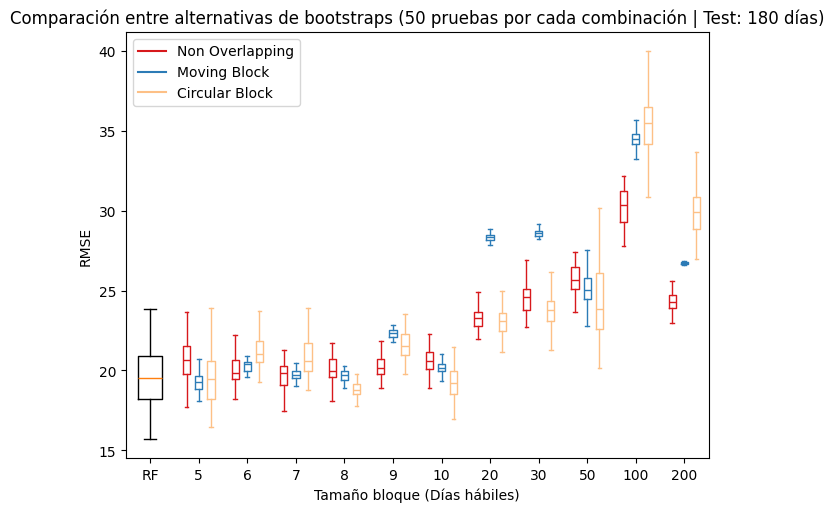

In [68]:
all_arr, ticksIdx, ticksNames = getGraphData(precisionNonOverlapping)
all_arr1, ticksIdx, ticksNames = getGraphData(precisionMovingBlock)
all_arr2, ticksIdx, ticksNames = getGraphData(precisionCircularBlock)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp0 = plt.boxplot(all_arr, positions=np.array(range(len(all_arr)))*2.0-0.5, sym='', widths=0.3)
bp1 = plt.boxplot(all_arr1, positions=np.array(range(len(all_arr1)))*2.0, sym='', widths=0.3)
bp2 = plt.boxplot(all_arr2, positions=np.array(range(len(all_arr1)))*2.0+0.5, sym='', widths=0.3)
bp_1 = plt.boxplot(rf_array, positions=np.array(range(len(rf_array))), sym='', widths=1)
set_box_color(bp0, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp1, '#2C7BB6')
set_box_color(bp2, '#fdc086')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Non Overlapping')
plt.plot([], c='#2C7BB6', label='Moving Block')
plt.plot([], c='#fdc086', label='Circular Block')
plt.legend()

plt.xticks(range(0, len(ticksNames) * 2, 2), ticksNames)
# plt.xlim(-2, len(ticks)*2)
#plt.ylim(34, 55)
plt.tight_layout()
plt.title("Comparación entre alternativas de bootstraps (50 pruebas por cada combinación | Test: 180 días)")
plt.xlabel("Tamaño bloque (Días hábiles)")
plt.ylabel("RMSE")

Text(38.222222222222214, 0.5, 'RMSE')

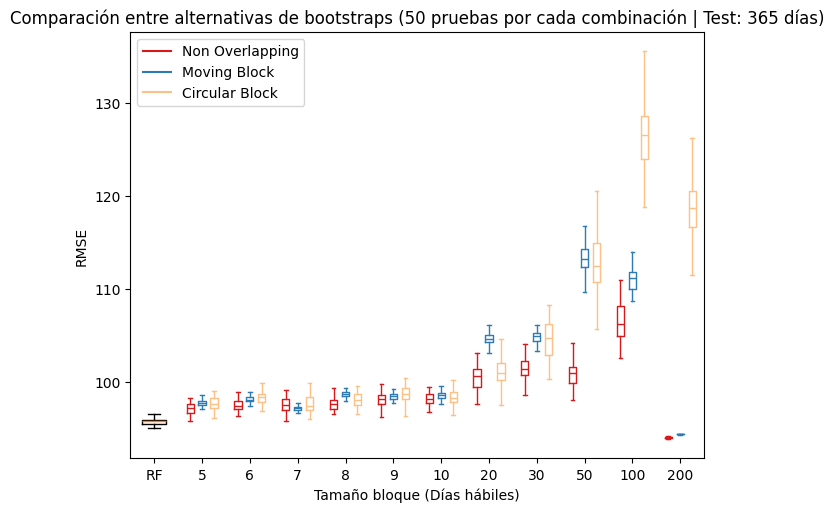

In [69]:
all_arr, ticksIdx, ticksNames = getGraphData(precisionNonOverlapping_1y)
all_arr1, ticksIdx, ticksNames = getGraphData(precisionMovingBlock_1y)
all_arr2, ticksIdx, ticksNames = getGraphData(precisionCircularBlock_1y)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp0 = plt.boxplot(all_arr, positions=np.array(range(len(all_arr)))*2.0-0.5, sym='', widths=0.3)
bp1 = plt.boxplot(all_arr1, positions=np.array(range(len(all_arr1)))*2.0, sym='', widths=0.3)
bp2 = plt.boxplot(all_arr2, positions=np.array(range(len(all_arr1)))*2.0+0.5, sym='', widths=0.3)
bp_1 = plt.boxplot(rf_array_1y, positions=np.array(range(len(rf_array_1y))), sym='', widths=1)
set_box_color(bp0, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp1, '#2C7BB6')
set_box_color(bp2, '#fdc086')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Non Overlapping')
plt.plot([], c='#2C7BB6', label='Moving Block')
plt.plot([], c='#fdc086', label='Circular Block')
plt.legend()

plt.xticks(range(0, len(ticksNames) * 2, 2), ticksNames)
# plt.xlim(-2, len(ticks)*2)
#plt.ylim(34, 55)
plt.tight_layout()
plt.title("Comparación entre alternativas de bootstraps (50 pruebas por cada combinación | Test: 365 días)")
plt.xlabel("Tamaño bloque (Días hábiles)")
plt.ylabel("RMSE")

Text(47.222222222222214, 0.5, 'RMSE')

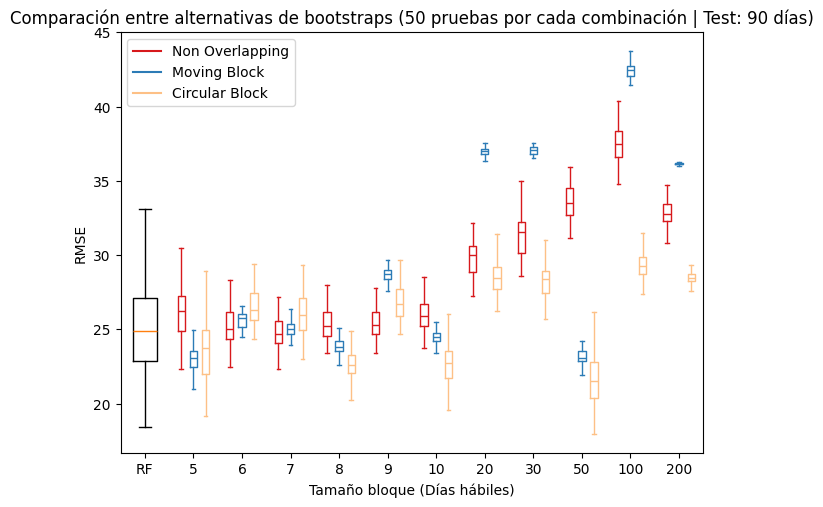

In [70]:
all_arr, ticksIdx, ticksNames = getGraphData(precisionNonOverlapping_2y)
all_arr1, ticksIdx, ticksNames = getGraphData(precisionMovingBlock_2y)
all_arr2, ticksIdx, ticksNames = getGraphData(precisionCircularBlock_2y)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bp0 = plt.boxplot(all_arr, positions=np.array(range(len(all_arr)))*2.0-0.5, sym='', widths=0.3)
bp1 = plt.boxplot(all_arr1, positions=np.array(range(len(all_arr1)))*2.0, sym='', widths=0.3)
bp2 = plt.boxplot(all_arr2, positions=np.array(range(len(all_arr1)))*2.0+0.5, sym='', widths=0.3)
bp_1 = plt.boxplot(rf_array_2y, positions=np.array(range(len(rf_array_2y))), sym='', widths=1)
set_box_color(bp0, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp1, '#2C7BB6')
set_box_color(bp2, '#fdc086')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Non Overlapping')
plt.plot([], c='#2C7BB6', label='Moving Block')
plt.plot([], c='#fdc086', label='Circular Block')
plt.legend()

plt.xticks(range(0, len(ticksNames) * 2, 2), ticksNames)
# plt.xlim(-2, len(ticks)*2)
#plt.ylim(34, 55)
plt.tight_layout()
plt.title("Comparación entre alternativas de bootstraps (50 pruebas por cada combinación | Test: 90 días)")
plt.xlabel("Tamaño bloque (Días hábiles)")
plt.ylabel("RMSE")